# Python for data analysis and visualisation

## Online short course at the University of St Andrews

## Final assignment

### Tillman Froehlich

In [593]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

%matplotlib inline

#### Dataset Refinement

Run the executable python script `refine.py` on the original dataset.

In [594]:
#%run ../code/refine.py ../data/Scotland_teaching_file_1PCT.csv

Now read the data off the refined dataset created by `refine.py`.

In [595]:
df = pd.read_csv("../data/Refined_dataset.csv")
df

,Record_Number,Region,RESIDENCE_TYPE,Family_Composition,sex,age,Marital_Status,student,Country_Of_Birth,health,Ethnic_Group,religion,Economic_Activity,Occupation,industry,Hours_Worked_Per_Week,Approximate_Social_Grade
0,1,S92000003,P,1,1,4,2,2,2,2,1,5,1,5,5,4,3
1,2,S92000003,P,0,1,3,1,2,1,2,1,1,1,1,8,3,2
2,3,S92000003,P,1,2,4,2,2,1,3,1,1,1,4,8,2,4
3,4,S92000003,P,1,2,6,2,2,1,1,1,1,1,2,8,4,2
4,5,S92000003,P,4,2,4,4,2,1,2,1,2,1,3,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63381,63384,S92000003,P,1,1,2,1,1,1,1,1,2,6,X,X,X,3
63382,63385,S92000003,P,1,1,4,2,2,1,1,1,1,1,3,9,3,2
63383,63386,S92000003,P,1,1,5,2,2,1,1,1,9,1,8,3,4,4
63384,63387,S92000003,P,4,2,1,1,1,1,1,1,9,X,X,X,X,X


This dataset can now be used for further data analysis.

#### Descriptive Analysis

* perform the descriptive analysis of the dataset:

  *    determine the total number of records in the dataset;

  *    determine the type of each variable in the dataset;

  *    for each variable except “Record_Number” and “Region”, find all different values that it takes, and the number of occurrences for each value,



In [596]:
df.shape[0]

63386

In [597]:
df.dtypes

Record_Number                int64
Region                      object
RESIDENCE_TYPE              object
Family_Composition          object
sex                          int64
age                          int64
Marital_Status               int64
student                      int64
Country_Of_Birth             int64
health                       int64
Ethnic_Group                 int64
religion                     int64
Economic_Activity           object
Occupation                  object
industry                    object
Hours_Worked_Per_Week       object
Approximate_Social_Grade    object
dtype: object

In [598]:
# Ignore "Record_Number" and "Region" columns
df_data = df.drop(["Record_Number", "Region"], axis = 1)

for col_name in df_data.columns:
    # Find all values taken in each column
    count = df_data[col_name].value_counts()
    col_index = count.index
    print(col_name)

    for value in col_index:
        # Print number of occurences of each value
        print(value, count.loc[value])

RESIDENCE_TYPE
P 62237
C 1149
Family_Composition
1 33336
0 11715
4 7757
2 7660
X 1149
3 1019
5 750
sex
2 32695
1 30691
age
1 10979
5 9336
4 8962
3 8056
6 7854
2 7541
7 5731
8 4927
Marital_Status
1 29610
2 23917
4 4159
5 4032
3 1668
student
2 51395
1 11991
Country_Of_Birth
1 59043
2 4343
health
1 33435
2 18824
3 7544
4 2759
5 824
Ethnic_Group
1 60899
3 1667
4 376
2 199
6 165
5 80
religion
2 34200
1 23306
9 4335
6 906
4 187
8 162
7 116
3 113
5 61
Economic_Activity
1 25349
5 11527
X 10979
2 3623
6 2691
8 2543
3 2183
4 1743
7 1741
9 1007
Occupation
X 14434
9 7256
2 7237
5 6140
4 6010
3 5015
7 4934
6 4484
8 4326
1 3550
industry
X 14434
4 7556
11 6817
2 6318
8 4818
10 4123
3 3876
6 3754
5 3309
9 3225
7 1979
13 1172
12 1107
1 898
Hours_Worked_Per_Week
X 32850
3 18333
2 6518
4 3542
1 2143
Approximate_Social_Grade
2 15607
4 14709
X 12089
3 11601
1 9380


#### Bar Charts

In [599]:
def get_cats_counts(dataframe, variable):
    """Gets the distribution of 'variable' in 'dataframe'.

    Returns 2 lists:
    categories  A list of all the values taken in the
                'variable' column of 'dataframe'.
    counts      A list of how many times each category
                occurs in the column.
    """
    # Get a pandas series containing the required data
    counts_series = dataframe[variable].value_counts()

    # Extract categories and counts from this series
    categories = counts_series.index.to_list()
    counts = counts_series.to_list()

    return categories, counts

In [600]:
# Make a dataframe which stores bar chart information
chart_data = pd.DataFrame(columns = ["Categories", "Counts"])

for i in range(len(df_data.columns)):
    variable = df_data.columns[i]
    categories, counts = get_cats_counts(df_data, variable)
    chart_data.loc[variable] = [categories, counts]

chart_data

,Categories,Counts
RESIDENCE_TYPE,"[P, C]","[62237, 1149]"
Family_Composition,"[1, 0, 4, 2, X, 3, 5]","[33336, 11715, 7757, 7660, 1149, 1019, 750]"
sex,"[2, 1]","[32695, 30691]"
age,"[1, 5, 4, 3, 6, 2, 7, 8]","[10979, 9336, 8962, 8056, 7854, 7541, 5731, 4927]"
Marital_Status,"[1, 2, 4, 5, 3]","[29610, 23917, 4159, 4032, 1668]"
student,"[2, 1]","[51395, 11991]"
Country_Of_Birth,"[1, 2]","[59043, 4343]"
health,"[1, 2, 3, 4, 5]","[33435, 18824, 7544, 2759, 824]"
Ethnic_Group,"[1, 3, 4, 2, 6, 5]","[60899, 1667, 376, 199, 165, 80]"
religion,"[2, 1, 9, 6, 4, 8, 7, 3, 5]","[34200, 23306, 4335, 906, 187, 162, 116, 113, 61]"


In [601]:
def bar_chart(data, meanings, variable):
    """Plots a bar chart of specified variable.
    
    Finds categoreis and bar heights in 'data',
    finds readable labels and title in 'meanings'.
    """
    categories = data.loc[variable]["Categories"]
    counts = data.loc[variable]["Counts"]
    # Use the meanings dataframe to translate labels
    labels = [meanings.loc[variable]["Dictionary"][str(cat)] for cat in categories]
    y_pos = range(len(labels))

    plt.bar(y_pos, counts)
    plt.xticks(y_pos, labels, rotation = 90)
    plt.ylabel("Frequency")
    plt.xlabel("Category")
    plt.title(meanings.loc[variable]["Title"])
    plt.show()

In [602]:
# Read in the meanings dataframe (created earlier) from the data folder
meanings_df = pd.read_csv("../data/Meanings.csv", index_col = 0)

# Apply literal eval to convert 'Dictionary' column from string to dictionary
meanings_df["Dictionary"] = meanings_df["Dictionary"].apply(literal_eval)

meanings_df

,Title,Dictionary
RESIDENCE_TYPE,Residence Type,"{'C': 'Resident in a Communal Establishment', ..."
Family_Composition,Family Composition,"{'0': 'Not in a family', '1': 'Married/same-se..."
sex,Sex,"{'1': 'Male', '2': 'Female'}"
age,Age,"{'1': '0 to 15', '2': '16 to 24', '3': '25 to ..."
Marital_Status,Marital Status,{'1': 'Single (Never married or never register...
student,Student,"{'1': 'Yes', '2': 'No'}"
Country_Of_Birth,Country Of Birth,"{'1': 'UK', '2': 'Non UK'}"
health,Health,"{'1': 'Very good health', '2': 'Good health', ..."
Ethnic_Group,Ethnic Group,"{'1': 'White', '2': 'Mixed or multiple ethnic ..."
religion,Religion,"{'1': 'No religion', '2': 'Christian', '3': 'B..."


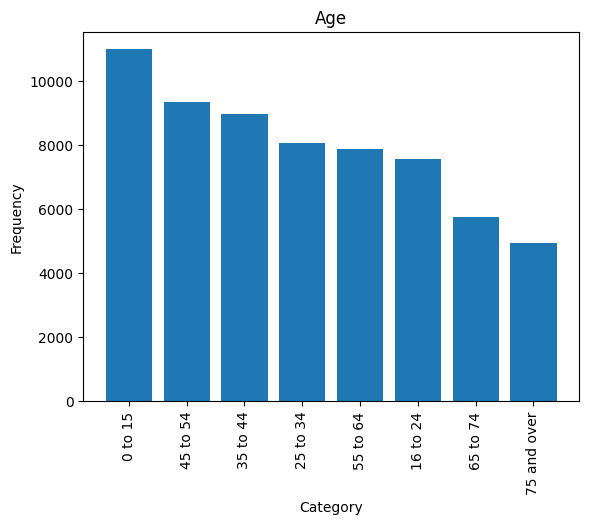

In [603]:
# Plot distribution of age using my function
bar_chart(chart_data, meanings_df, "age")

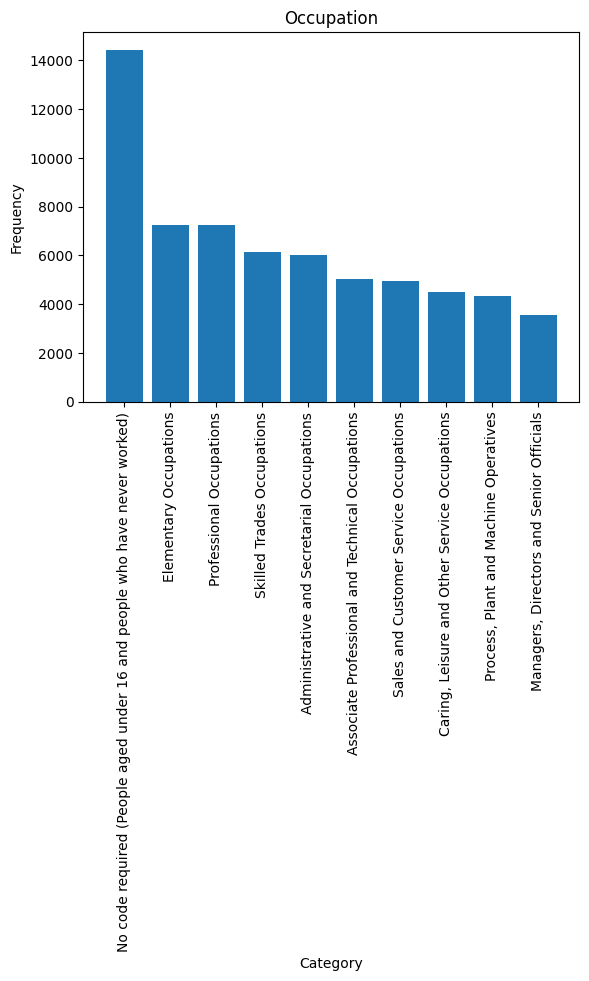

In [604]:
# Plot distribution of occupation using my function
bar_chart(chart_data, meanings_df, "Occupation")

#### Pie Charts

In [605]:
def pie_chart(data, meanings, variable):
    """Plots a pie chart of specified variable.
    
    Finds categoreis and percentages in 'data',
    finds readable labels and title in 'meanings'.
    """
    # Get categories and counts from 'data'
    categories = data.loc[variable]["Categories"]
    counts = data.loc[variable]["Counts"]

    # Calculate percentages and generate labels using 'meanings'
    percentages = [100*(count/sum(counts)) for count in counts]
    labels = [meanings.loc[variable]["Dictionary"][str(cat)] for cat in categories]
    labels = [f'{s:0.1f}% - {l}' for s, l in zip(percentages, labels)]

    # Plot the pie chart in a readable manner
    patches, texts = plt.pie(percentages, startangle = 90)
    plt.title(meanings.loc[variable]["Title"])
    plt.legend(patches, labels, loc='upper left', bbox_to_anchor = (-0.1, 1.), fontsize = 8)
    plt.show()

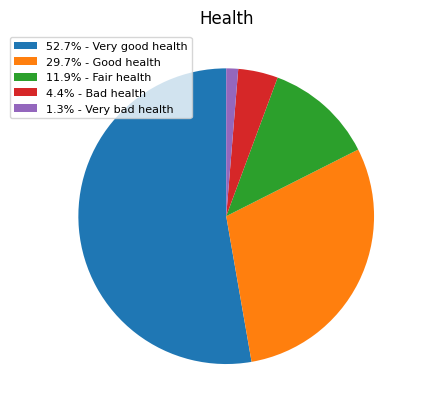

In [606]:
# Use my function to plot pie chart for 'Health' category
pie_chart(chart_data, meanings_df, "health")

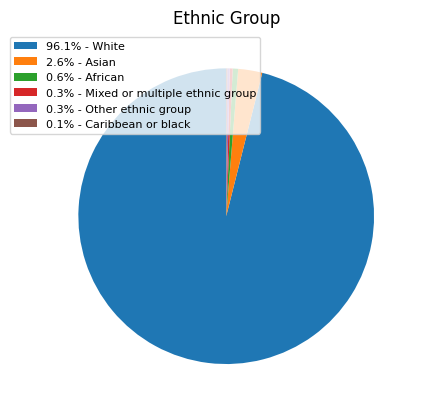

In [607]:
# Use my function to plot pie chart for 'Ethnic_Group' category
pie_chart(chart_data, meanings_df, "Ethnic_Group")

#### Grouped Data

In [608]:
# Group the data by industry and hours worked per week using groupby()

grouped_df_1 = df_data.groupby(["industry", "Hours_Worked_Per_Week"]).count()

print(grouped_df_1["RESIDENCE_TYPE"].head(10))

industry  Hours_Worked_Per_Week
1         1                          21
          2                          49
          3                         191
          4                         258
          X                         379
10        1                         230
          2                         661
          3                        1377
          4                         253
          X                        1602
Name: RESIDENCE_TYPE, dtype: int64


In [609]:
# Collect the information in a separate dataframe

ind_vs_hr = pd.DataFrame(columns = ["1", "2", "3", "4", "X"])

industries = ["1", "2", "3", "4", "5", "6", "7", "8", "9",
              "10", "11", "12", "13"]

for ind in industries:
    ind_vs_hr.loc[ind] = grouped_df_1.loc[ind]["RESIDENCE_TYPE"].to_list()

# Fill in values that should be zero
ind_vs_hr.loc["X"] = [0, 0, 0, 0, grouped_df_1["RESIDENCE_TYPE"]["X", "X"]]

ind_vs_hr

,1,2,3,4,X
1,21,49,191,258,379
2,58,201,2533,559,2967
3,44,166,1801,427,1438
4,619,1318,2255,410,2954
5,331,635,738,230,1375
6,72,371,1555,432,1324
7,34,224,1048,117,556
8,230,639,1936,425,1588
9,59,328,1592,130,1116
10,230,661,1377,253,1602


In [610]:
# Rename rows and columns using 'meanings_df' to display data

newcols = []
for col in ind_vs_hr.columns:
    newcols.append(meanings_df.loc["Hours_Worked_Per_Week"]["Dictionary"][str(col)])

ind_vs_hr.columns = newcols

newindex = []
for index in ind_vs_hr.index:
    newindex.append(meanings_df.loc["industry"]["Dictionary"][str(index)])

ind_vs_hr.index = newindex

ind_vs_hr

,Part-time: 15 or less hours worked,Part-time: 16 to 30 hours worked,Full-time: 31 to 48 hours worked,Full-time 49 or more hours worked,No code required (People aged under 16 and people not working)
"Agriculture, forestry and fishing",21,49,191,258,379
"Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply",58,201,2533,559,2967
Construction,44,166,1801,427,1438
Wholesale and retail trade; Repair of motor vehicles and motorcycles,619,1318,2255,410,2954
Accommodation and food service activities,331,635,738,230,1375
Transport and storage; Information and communication,72,371,1555,432,1324
Financial and insurance activities,34,224,1048,117,556
Real estate activities; Professional scientific and technical activities; Administrative and support service activities,230,639,1936,425,1588
Public administration and defence,59,328,1592,130,1116
Education,230,661,1377,253,1602


In [611]:
# Now group the data by occupation and approximate social grade

grouped_df_2 = df_data.groupby(["Occupation", "Approximate_Social_Grade"]).count()

print(grouped_df_2["RESIDENCE_TYPE"].head(10))

Occupation  Approximate_Social_Grade
1           1                           1413
            2                           1686
            3                            213
            4                            192
            X                             46
2           1                           4739
            2                           1670
            3                            465
            4                            289
            X                             74
Name: RESIDENCE_TYPE, dtype: int64


In [612]:
# Collect the information in a separate dataframe

occ_vs_asg = pd.DataFrame(columns = ["1", "2", "3", "4", "X"])

occupations = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "X"]

for occ in occupations:
    occ_vs_asg.loc[occ] = grouped_df_2.loc[occ]["RESIDENCE_TYPE"].to_list()

occ_vs_asg

,1,2,3,4,X
1,1413,1686,213,192,46
2,4739,1670,465,289,74
3,933,3336,377,280,89
4,707,3883,816,538,66
5,218,612,4056,1176,78
6,324,897,1530,1679,54
7,381,1393,870,2172,118
8,98,367,1618,2183,60
9,247,933,1196,4675,205
X,320,830,460,1525,11299


In [613]:
# Rename rows and columns using 'meanings_df' to display data

newcols = []
for col in occ_vs_asg.columns:
    newcols.append(meanings_df.loc["Approximate_Social_Grade"]["Dictionary"][str(col)])

occ_vs_asg.columns = newcols

newindex = []
for index in occ_vs_asg.index:
    newindex.append(meanings_df.loc["Occupation"]["Dictionary"][str(index)])

occ_vs_asg.index = newindex

occ_vs_asg

,AB,C1,C2,DE,No code required ( People aged under 16 and people resident in communal establishments)
"Managers, Directors and Senior Officials",1413,1686,213,192,46
Professional Occupations,4739,1670,465,289,74
Associate Professional and Technical Occupations,933,3336,377,280,89
Administrative and Secretarial Occupations,707,3883,816,538,66
Skilled Trades Occupations,218,612,4056,1176,78
"Caring, Leisure and Other Service Occupations",324,897,1530,1679,54
Sales and Customer Service Occupations,381,1393,870,2172,118
"Process, Plant and Machine Operatives",98,367,1618,2183,60
Elementary Occupations,247,933,1196,4675,205
No code required (People aged under 16 and people who have never worked),320,830,460,1525,11299


#### Counting Data

In [614]:
def num_eco_active(df, var, value):
    """Returns the number of economically active peoploe
    in df dataframe depending on the value of var variable."""

    return len(df[
        (df[var] == value) & 
        (df["Economic_Activity"].to_string() in ["1", "2", "3", "4"])])

In [615]:
num_eco_active(df_data, "age", "6")

0